In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

C:\Users\User\anaconda3\envs\honeylab\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.82169e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


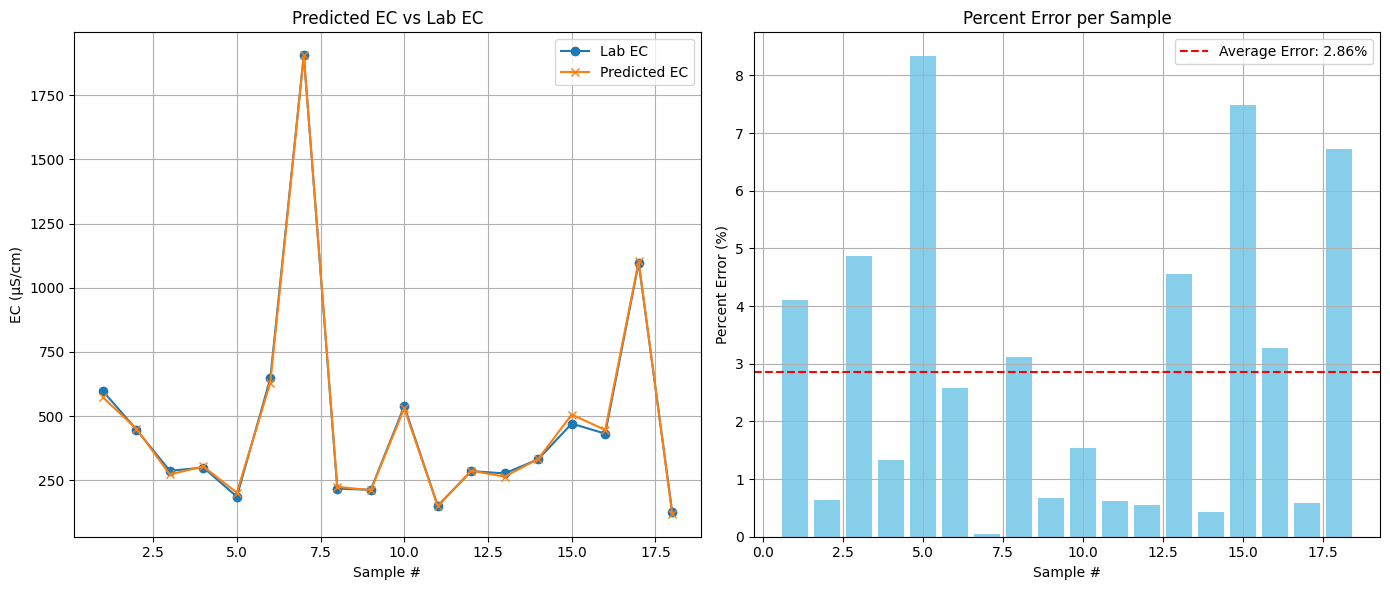

In [9]:
# Data (excluding sample 6 and 7)
gravity_tds_values = np.array([775.75, 570.95, 287.75, 335.6, 180.55, 872.45, 2679.9, 214.5, 194.75, 703.65, 104.1, 310.15, 274.5, 381.7, 662.75, 563.2, 1659.1, 60.75])
lab_ec_values = np.array([598, 448, 287, 300, 186.5, 647, 1906, 218, 213, 539, 150.8, 286, 277, 332, 471, 432, 1097, 128.3])

X = gravity_tds_values.reshape(-1, 1)
y = lab_ec_values

# Train Ridge regression model
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = Ridge(alpha=1.0)
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Calculate percent error
percent_error = np.abs((y_pred - y) / y) * 100
average_error = np.mean(percent_error)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Predicted vs Lab EC
axs[0].plot(range(1, len(y) + 1), y, label='Lab EC', marker='o')
axs[0].plot(range(1, len(y) + 1), y_pred, label='Predicted EC', marker='x')
axs[0].set_title("Predicted EC vs Lab EC")
axs[0].set_xlabel("Sample #")
axs[0].set_ylabel("EC (µS/cm)")
axs[0].legend()
axs[0].grid(True)

# Subplot 2: Percent Error
axs[1].bar(range(1, len(y) + 1), percent_error, color='skyblue')
axs[1].axhline(average_error, color='red', linestyle='--', label=f'Average Error: {average_error:.2f}%')
axs[1].set_title("Percent Error per Sample")
axs[1].set_xlabel("Sample #")
axs[1].set_ylabel("Percent Error (%)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()